In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups

In [3]:
data = fetch_20newsgroups()
categories = data.target_names

categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
train = fetch_20newsgroups(subset='train', categories=categories)   # we can drop assigning categories if we want all

test = fetch_20newsgroups(subset='test', categories=categories)

In [11]:
print(train.data[0], train.target[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----




 7


In [12]:
categories[7]

'rec.autos'

## Simple Example

In [13]:
import pandas as pd
words = ['love', 'you', 'yeah', 'dance']
data = [[50, 25, 0, 80], [100, 40, 50, 20]]
X = pd.DataFrame(data, columns=words, index=['abba', 'beatles'])

In [15]:
print(X)

         love  you  yeah  dance
abba       50   25     0     80
beatles   100   40    50     20


$P(A=Abba|song=\text{"love you"}) =$
$ \frac{P(\text{"love"}|Abba) \text{ $*$ } P(\text{"you"}|Abba) \text{ $*$ } P(Abba)}{ \text{ ( }P(\text{"love"}|Abba) \text{ $*$ } P(\text{"you"}|Abba) \text{ $*$ } P(Abba)\text{ ) } \text{ $+$ } \text{ ( } P(\text{"love"}|Beatles) \text{ $*$ } P(\text{"you"}|Beatles) \text{ $*$ } P(Beatles)\text{ ) }}$

In [16]:
num = ((50 / (50+25+0+80)) * (25 / (50+25+0+80)) * (0.5))
denom = (50 / (50+25+0+80)) * (25 / (50+25+0+80)) * (0.5) + (100 / (100+40+50+20)) * (40 / (100+40+50+20)) * (0.5)

In [17]:
p_abba = num / denom
p_abba

0.36452306166308485

In [21]:
from sklearn.naive_bayes import MultinomialNB
m = MultinomialNB(alpha=0.1)
m.fit(X, ['abba', 'beatles'])
m.predict_proba([[1, 1, 0, 0]])
#right on the dot! very sliiiiightly off due to the alpha term most likely

array([[0.36478831, 0.63521169]])

## Back to original news articles example

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline




In [24]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)

labels = model.predict(test.data)

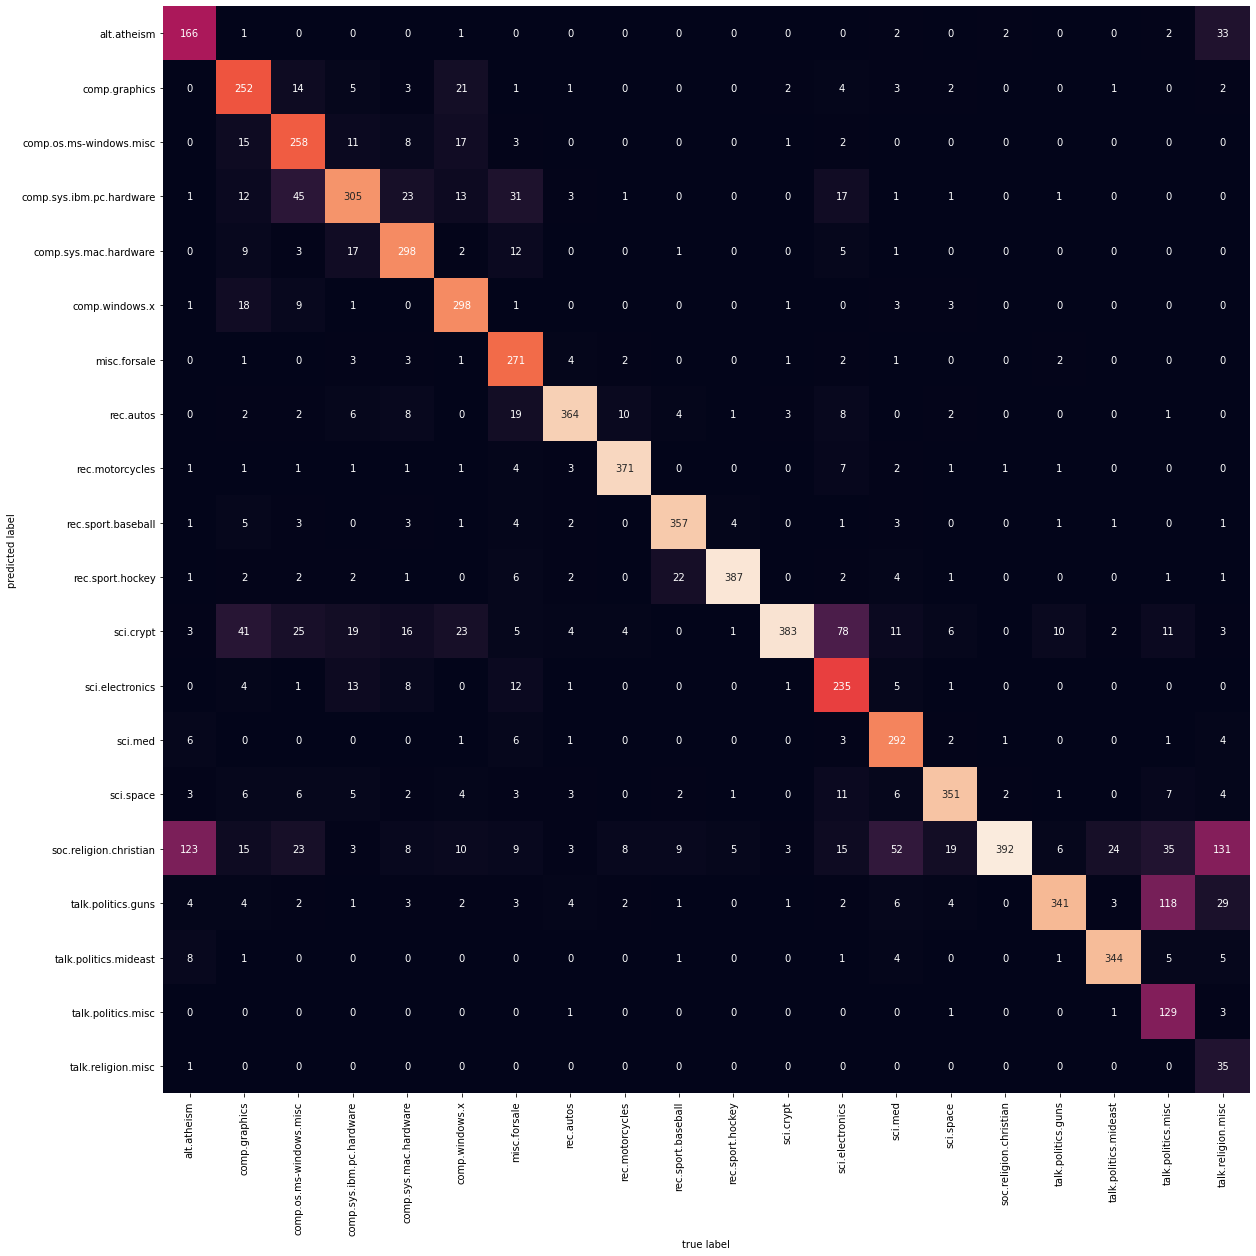

In [33]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(20,20))

mat = confusion_matrix(test.target, labels)

ax = sns.heatmap(mat.T, annot=True, cbar=False, square=True, fmt='d',
           xticklabels=train.target_names, yticklabels=train.target_names)


plt.xlabel("true label")
plt.ylabel("predicted label")

plt.show()
